In [1]:
!pip install pycce
!pip install ase

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pycce as pc
import ase
from mpl_toolkits import mplot3d

In [121]:
seed = 8805
np.set_printoptions(suppress=True, precision=5)
#from https://pycce.readthedocs.io/en/latest/tutorials/diamond_nv.html
filename="ti.xyz"
xyz = open(filename)
#print(xyz.read()) #prints the hole file
n_atoms = int(xyz.readline())
#print(n_atoms) #number of atoms 
title = xyz.readline()
xr=[]
yr=[]
zr=[]
xtr=[]
ytr=[]
ztr=[]
xcr=[]
ycr=[]
zcr=[]
for line in xyz:
    atom,x,y,z = line.split()
    # Titanium atoms
    if atom == 'Ti':
        xtr.append(float(x))
        ytr.append(float(y))
        ztr.append(float(z))
    # Carbon atoms 
    elif atom == 'C':
        xcr.append(float(x))
        ycr.append(float(y))
        zcr.append(float(z))
    # Hydrogen atoms
    else:
        xr.append(float(x))
        yr.append(float(y))
        zr.append(float(z))


__Creating the bath__

from https://pycce.readthedocs.io/en/latest/tutorials/sic_vv.html

In [122]:
## Set up unit cell with (a, b, c, alpha, beta, gamma)
titanium=pc.BathCell(11.1780,10.9930,8.4690,90.0,90.0,90.0)
# z axis in cell coordinates
titanium.zdir=[0,0,1]

for i in range(n_atoms):
    titanium.add_atoms((str(atom),[float(x),float(y),float(z)])),
#Generate bath spin positions
atoms=titanium.gen_supercell(200,seed=seed)

Visualization

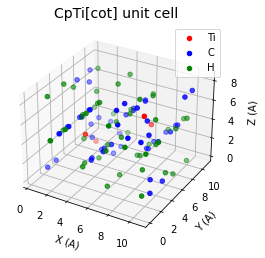

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(xtr,ytr,ztr, c='r', marker='o', label='Ti')
ax.scatter3D(xcr,ycr,zcr, c='b', marker='o', label='C')
ax.scatter3D(xr,yr,zr, c='green', marker='o', label='H')


ax.legend()
ax.set_xlabel('X (A)')
ax.set_ylabel('Y (A)')
ax.set_zlabel('Z (A)')

plt.title("CpTi[cot] unit cell", fontsize = 14) 

plt.show()

Setting the simulator and computing coherence function

In [124]:
cce_order=3
position=[0,0,0]
r_bath=40
r_dipole=6
B=np.array([0,0,500])

In [125]:
calc=pc.Simulator(spin=1, position=position, bath=atoms, r_bath=r_bath, magnetic_field=B, pulses=1, r_dipole=r_dipole, order=1)

In [38]:
read=calc.read_bath()
print(read)

[('1H', [ 20.30025,   3.36414,  22.263  ], [[ 0.97952,  0.63259,  4.18629], [ 0.63259, -2.73287,  0.69375], [ 4.18629,  0.69375,  1.75335]], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 ('1H', [ 26.95563,  13.54505, -14.54348], [[ 1.986  ,  2.05565, -2.20718], [ 2.05565, -1.07195, -1.10909], [-2.20718, -1.10909, -0.91405]], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 ('1H', [  4.22098,  13.23137,  30.81489], [[-1.95173,  0.30028,  0.69934], [ 0.30028, -1.10623,  2.1922 ], [ 0.69934,  2.1922 ,  3.05796]], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 ...
 ('2H', [ 23.34835,  -9.20516,  28.65391], [[ 0.02793, -0.09759,  0.30378], [-0.09759, -0.18113, -0.11976], [ 0.30378, -0.11976,  0.1532 ]], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 ('2H', [ 36.37952,  -6.5031 ,  13.71111], [[ 0.30822, -0.09052,  0.19085], [-0.09052, -0.18199, -0.03412], [ 0.19085, -0.03412, -0.12624]], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
 ('2H', [ 10.87636,  23.41228,  27.88441], [[-0.16683,  0.11702,  0.13

In [42]:
clusters = calc.generate_clusters()


In [126]:
time_steps = np.linspace(0, 2 ,100) #time points in ms at which the coherence function is computed
n=1 #pulses in Carr-Purcell-Meiboom-Gill (CPMG) sequence 

#use coherence function with conventional CCE
l_conv = calc.compute(time_steps, pulses=n, method='cce', quantity='coherence', as_delay=False)

In [44]:
print(l_conv)

[1.     +0.j 0.67512+0.j 0.67049+0.j 0.98763-0.j 0.78604-0.j 0.82269+0.j
 0.92101-0.j 0.7567 +0.j 0.93643+0.j 0.82766-0.j 0.60098-0.j 0.98867-0.j
 0.85238+0.j 0.57204+0.j 0.99805+0.j 0.8783 -0.j 0.76353+0.j 0.98789+0.j
 0.76864-0.j 0.89688+0.j 0.93326-0.j 0.60669-0.j 0.93977+0.j 0.93183+0.j
 0.56371+0.j 0.94427+0.j 0.88996-0.j 0.76259-0.j 0.99039-0.j 0.74299-0.j
 0.86955+0.j 0.99722+0.j 0.59079-0.j 0.87702-0.j 0.98493+0.j 0.5746 -0.j
 0.8312 +0.j 0.94481-0.j 0.76608-0.j 0.91777-0.j 0.83111-0.j 0.78705+0.j
 0.98548+0.j 0.68717-0.j 0.75154-0.j 0.99997-0.j 0.67262-0.j 0.68661-0.j
 0.98595-0.j 0.82661+0.j 0.81118-0.j 0.9151 -0.j 0.79691-0.j 0.92875+0.j
 0.80997+0.j 0.68119-0.j 0.98947-0.j 0.78905+0.j 0.58962-0.j 0.99885-0.j
 0.85166+0.j 0.77325+0.j 0.98557-0.j 0.77825+0.j 0.88756-0.j 0.92903-0.j
 0.62641+0.j 0.95586-0.j 0.91138+0.j 0.51719+0.j 0.95733-0.j 0.91478+0.j
 0.71908-0.j 0.99127-0.j 0.77546+0.j 0.84685-0.j 0.99621+0.j 0.62846-0.j
 0.87407-0.j 0.98118+0.j 0.56253-0.j 0.82943+0.j 0.

In [45]:
%%timeit
calc.compute(time_steps, pulses=n, magnetic_field=B,
             method='cce', quantity='coherence', as_delay=False)

5.72 s ± 93.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


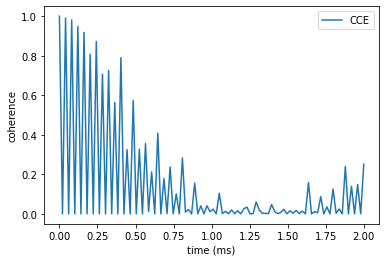

In [127]:
plt.plot(time_steps,l_conv.real, label='CCE')
plt.legend();
plt.xlabel('time (ms)')
plt.ylabel('coherence');